In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


transform = transforms.Compose([
    transforms.Resize((32, 32)),   
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])


train_data = datasets.ImageFolder(root="data", transform=transform)


train_size = int(0.8 * len(train_data))
test_size = len(train_data) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(train_data, [train_size, test_size])

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


class cnn_custom(nn.Module):
    def __init__(self, num_classes):
        super(cnn_custom, self).__init__()
        self.cnn1 = nn.Conv2d(3, 6, 3)
        self.cnn2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)
        
    def forward(self, x):
        x = torch.relu(self.cnn1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.cnn2(x))
        x = torch.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


num_classes = len(train_data.classes)  # auto-detect classes
print("Classes:", train_data.classes)

model = cnn_custom(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)


for epoch in range(10):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch [{epoch+1}/10], Loss: {loss.item():.4f}")


model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy = {(100 * correct / total):.2f}%")

Classes: ['bike', 'cars', 'cats', 'data', 'dogs', 'flowers', 'horses', 'human']
Epoch [1/10], Loss: 2.0454
Epoch [1/10], Loss: 2.0454
Epoch [2/10], Loss: 1.5929
Epoch [2/10], Loss: 1.5929
Epoch [3/10], Loss: 1.1178
Epoch [3/10], Loss: 1.1178
Epoch [4/10], Loss: 0.7310
Epoch [4/10], Loss: 0.7310
Epoch [5/10], Loss: 1.6758
Epoch [5/10], Loss: 1.6758
Epoch [6/10], Loss: 1.6882
Epoch [6/10], Loss: 1.6882
Epoch [7/10], Loss: 1.0749
Epoch [7/10], Loss: 1.0749
Epoch [8/10], Loss: 1.0607
Epoch [8/10], Loss: 1.0607
Epoch [9/10], Loss: 1.6749
Epoch [9/10], Loss: 1.6749
Epoch [10/10], Loss: 2.2876
Epoch [10/10], Loss: 2.2876
Accuracy = 49.58%
Accuracy = 49.58%


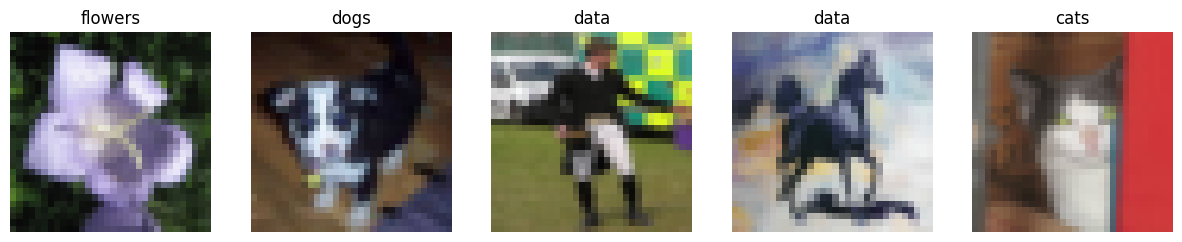

In [4]:
import matplotlib.pyplot as plt

# Get a batch of images and labels
images, labels = next(iter(train_loader))

# Display the first 5 images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    img = images[i].permute(1, 2, 0).numpy()
    img = img * 0.5 + 0.5  # Unnormalize
    axes[i].imshow(img)
    axes[i].set_title(train_data.classes[labels[i]])
    axes[i].axis('off')
plt.show()